# 4- Machine Learning

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor  
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [74]:
d = pd.read_excel("adverts.xlsx")
d = d.drop("Unnamed: 0.1", axis=1)
d = d.drop("Unnamed: 0", axis=1)
df = d.copy()

In [8]:
df

,city,district,neighborhood,room,m²,price
0,Adana,Ceyhan,Cumhuriyet,2+1,130,7000
1,Adana,Ceyhan,Cumhuriyet,4+1,180,12000
2,Adana,Ceyhan,Cumhuriyet,2+1,115,7250
3,Adana,Ceyhan,Hürriyet,3+1,185,11500
4,Adana,Ceyhan,Ulus,3+1,165,9000
...,...,...,...,...,...,...
24602,Yozgat,Sorgun,Yeni,3+1,120,3500
24603,Yozgat,Yerköy,100. Yıl,3+1,135,4250
24604,Yozgat,Yerköy,Ayanoğlu,3+1,135,5250
24605,Yozgat,Yerköy,100. Yıl,3+1,140,3250


In [9]:
# Assing dummy variable to columns for each room type
df = pd.get_dummies(df, columns=["room"], prefix=["room"])

In [10]:
# learn how many advert for each room type using cplumns that assing dummy 
arr= [df["room_1+0"].sum(), df["room_1+1"].sum(), df["room_2+1"].sum(), df["room_3+1"].sum(), df["room_4+1"].sum()]
arr

[478, 4720, 9125, 9054, 1230]

In [11]:
# Apply LabelEencoder transformation for 'city', 'district', 'neighborhood'
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the string column 'city'
df['city_le'] = le.fit_transform(df['city'])

# Encode the string column 'district'
df['district_le'] = le.fit_transform(df['district'])

# Encode the string column 'neighborhood'
df['neighborhood_le'] = le.fit_transform(df['neighborhood'])

In [12]:
df = df.drop(["city","district","neighborhood"], axis=1)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m²,24607.0,112.512984,39.937221,20.0,85.0,110.0,140.0,230.0
price,24607.0,14503.486366,6926.190760,2000.0,10000.0,13000.0,17500.0,57500.0
room_1+0,24607.0,0.019425,0.138017,0.0,0.0,0.0,0.0,1.0
room_1+1,24607.0,0.191815,0.393737,0.0,0.0,0.0,0.0,1.0
room_2+1,24607.0,0.370829,0.483037,0.0,0.0,0.0,1.0,1.0
room_3+1,24607.0,0.367944,0.482256,0.0,0.0,0.0,1.0,1.0
room_4+1,24607.0,0.049986,0.217920,0.0,0.0,0.0,0.0,1.0
city_le,24607.0,41.843947,27.592971,0.0,8.0,48.0,71.0,73.0
district_le,24607.0,192.843134,107.174784,0.0,107.0,196.0,278.0,377.0
neighborhood_le,24607.0,1198.389361,722.557204,0.0,523.0,1202.0,1861.0,2403.0


In [14]:
df.head()

,m²,price,room_1+0,room_1+1,room_2+1,room_3+1,room_4+1,city_le,district_le,neighborhood_le
0,130,7000,0,0,1,0,0,0,88,486
1,180,12000,0,0,0,0,1,0,88,486
2,115,7250,0,0,1,0,0,0,88,486
3,185,11500,0,0,0,1,0,0,88,983
4,165,9000,0,0,0,1,0,0,88,1919


In [15]:
# Define dependet and independet variables

y = df["price"]
x = df.drop("price", axis=1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# for learning rate"test_data/all_data" that 2+1 room type  
(x_test["room_2+1"].sum()) / (x_test["room_2+1"].sum() + x_train["room_2+1"].sum())

0.1978082191780822

In [18]:
x_train

,m²,room_1+0,room_1+1,room_2+1,room_3+1,room_4+1,city_le,district_le,neighborhood_le
2444,115,0,0,0,1,0,5,190,2310
9061,75,0,1,0,0,0,25,321,1471
21152,70,0,0,1,0,0,48,326,34
5472,150,0,0,0,1,0,6,234,2401
7563,130,0,0,0,1,0,18,251,521
...,...,...,...,...,...,...,...,...,...
21575,150,0,0,0,1,0,49,90,1097
5390,185,0,0,0,1,0,6,220,955
860,49,0,1,0,0,0,5,142,2302
15795,145,0,0,1,0,0,71,311,256


#### Creating machine learning models

In [124]:
# KNN regression
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [125]:
y_pred_knn = knn_model.predict(x_test)

In [126]:
mse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mse_knn

5199.242918971513

In [25]:
# Decision Tree regression
dec_tree = DecisionTreeRegressor().fit(x_train, y_train)

In [26]:
y_pred_tree = dec_tree.predict(x_test)

In [27]:
mse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mse_tree

5431.531118786767

In [22]:
# Random Forest regression
rf = RandomForestRegressor().fit(x_train, y_train)

In [23]:
y_pred_rf = rf.predict(x_test)

In [24]:
mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mse_rf

4454.814112018028

In [28]:
# Cat Boost regression
cat_boost = CatBoostRegressor().fit(x_train, y_train)

Learning rate set to 0.065562
0:	learn: 6821.5661251	total: 164ms	remaining: 2m 43s
1:	learn: 6720.8916659	total: 169ms	remaining: 1m 24s
2:	learn: 6632.9600074	total: 173ms	remaining: 57.6s
3:	learn: 6558.1246617	total: 178ms	remaining: 44.2s
4:	learn: 6484.0469819	total: 186ms	remaining: 36.9s
5:	learn: 6421.7394644	total: 190ms	remaining: 31.5s
6:	learn: 6364.8298422	total: 198ms	remaining: 28.1s
7:	learn: 6309.2562261	total: 204ms	remaining: 25.2s
8:	learn: 6259.4989354	total: 208ms	remaining: 22.9s
9:	learn: 6207.0990039	total: 213ms	remaining: 21s
10:	learn: 6168.0593101	total: 217ms	remaining: 19.6s
11:	learn: 6131.8349978	total: 223ms	remaining: 18.3s
12:	learn: 6089.5579836	total: 227ms	remaining: 17.2s
13:	learn: 6057.8134514	total: 233ms	remaining: 16.4s
14:	learn: 6029.0753890	total: 239ms	remaining: 15.7s
15:	learn: 6000.0332560	total: 244ms	remaining: 15s
16:	learn: 5971.4125259	total: 249ms	remaining: 14.4s
17:	learn: 5943.0255048	total: 253ms	remaining: 13.8s
18:	learn:

In [29]:
y_pred_cat = cat_boost.predict(x_test)

In [30]:
mse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mse_cat

4379.82048845411

In [35]:
# Bagged Trees regression
bag_model = BaggingRegressor(bootstrap_features = True).fit(x_train, y_train)

In [36]:
y_pred_bag = bag_model.predict(x_test)

In [37]:
mse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
mse_bag

4327.77377227226

In [ ]:
lgbm_model = LGBMRegressor().fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_test)

In [ ]:
!pip install lightgbm

In [ ]:
mse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
mse_lgbm

In [38]:
# Gradient Boosting regression
gbm_model = GradientBoostingRegressor().fit(x_train, y_train)

In [39]:
y_pred_gbm = gbm_model.predict(x_test)

In [40]:
mse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
mse_gbm

5095.605095492102

In [281]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 2.7 MB/s eta 0:00:00


In [41]:
# XGBoost regression
xgb_model = XGBRegressor().fit(x_train, y_train)

In [42]:
y_pred_xgb = xgb_model.predict(x_test)

In [43]:
mse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mse_xgb

4277.446249084818

<BarContainer object of 8 artists>

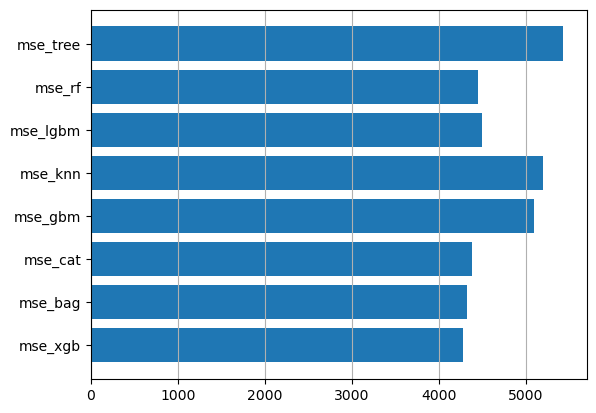

In [147]:
all_mse = pd.DataFrame({
    "x": ["mse_xgb","mse_bag","mse_cat","mse_gbm","mse_knn","mse_lgbm","mse_rf","mse_tree"],
    "y": [mse_xgb,mse_bag,mse_cat,mse_gbm,mse_knn,mse_lgbm,mse_rf,mse_tree]  
})

plt.grid(axis="x")
plt.barh(all_mse["x"], all_mse["y"])

In [ ]:
# XGB showed the best performance in this dataset

#### XGB model tuning

In [67]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [68]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(x_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [69]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 1000}

In [70]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(x_train,y_train)

In [71]:
y_pred = xgb_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4170.643619635636

### Show estimated price and many useful output using XGB model based on entered infos 

In [154]:
def pred_price(city, district, neighborhood, room, metrekare):
    
    if metrekare=="" and room=="1+0": 
        metrekare=40
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="1+1": 
        metrekare=65
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="2+1": 
        metrekare=100
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="3+1": 
        metrekare=130
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="4+1": 
        metrekare=160
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="": 
        metrekare=110
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    else: 
        pass
    new = pd.DataFrame({"city":[city], "district":[district], "neighborhood":[neighborhood], "room":[room], "m²":[metrekare]})
    new["m²"] = pd.to_numeric(new["m²"])

    
    if city!="" and city not in d["city"].tolist():
        print("--------------------------------\n\nBöyle bir il bulunamadı ya da bu ilde ilan yok!\n")
        print("Şehir ismini doğru yazdığınızdan emin olun!\nŞehrin baş harfini büyük yazmayı deneyin!\n")
        return None    
    if district!="" and district not in d["district"].tolist():
        print("--------------------------------\n\nBöyle bir ilçe bulunamadı ya da bu ilçede ilan yok!\n")
        print("İlçe ismini doğru yazdığınızdan emin olun!\nİlçenin baş harfini büyük yazmayı deneyin!\n")
        return None
    if neighborhood!="" and neighborhood not in d["neighborhood"].tolist():
        print("--------------------------------\n\nBöyle bir mahalle bulunamadı ya da bu mahallede ilan yok!\n")
        print("Mahalle ismini doğru yazdığınızdan emin olun!\nMahallenin baş harfini büyük yazmayı deneyin!\n")
        return None

    dff = d.drop("price", axis=1)
    dff = pd.concat([dff, new], axis=0)

    dff[""] = np.arange(len(dff))
    dff = dff.set_index("")

    dff = pd.get_dummies(dff, columns=["room"], prefix=["room"])

    # Encode the string column
    dff['city_le'] = le.fit_transform(dff['city'])
    
    # Encode the string column
    dff['district_le'] = le.fit_transform(dff['district'])
    
    # Encode the string column
    dff['neighborhood_le'] = le.fit_transform(dff['neighborhood'])

    dff =dff.drop(["city","district","neighborhood"], axis=1)
   
    if room=="":
        dff = dff.drop("room_", axis=1)
    
    train_data = dff.iloc[24607:,:]

    pred = xgb_tuned.predict(train_data)
    
    print(f"----------------------------\n\nGirilen bilgilere göre tahmini fiyat: {int(pred)} TL\n\n----------------------------")




    # write advertising infos according to inputs entered by user
    if city=="" and room!="":
        a=d[d["room"]==room]
        print(f"\nTürkiye'de toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
    elif district=="" and room!="":
        a=d[d["city"]==city]
        a=a[a["room"]==room]
        last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
        first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
        print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")

        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{city} ilinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
    elif neighborhood=="" and room!="":
        a=d[d["district"]==district]
        a=a[a["room"]==room]
        last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
        first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
        print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")    

        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{district} ilçesinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        #a=a.drop("Unnamed: 0", axis=1)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
    elif neighborhood != "" and room!="":
        a=d[d["district"]==district]
        a=a[a["neighborhood"]==neighborhood]
        a=a[a["room"]==room]
        last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
        first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
        print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")    

        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{neighborhood} mahallesinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        #a=a.drop("Unnamed: 0", axis=1)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")

    elif room=="" and city=="":
        print(f"Türkiye'de toplam {len(d)} tane ilan var.\n\n----------------------------")
    elif room == "" and district=="":
        a=d[d["city"]==city]
        last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
        first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
        print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")    

        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{city} ilinde toplam {len(a)} tane ilan var.\n\n----------------------------")
    elif room == "" and neighborhood=="":
        a=d[d["district"]==district]
        last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
        first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
        print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")    

        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{district} ilçesinde toplam {len(a)} tane ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        #a=a.drop("Unnamed: 0", axis=1)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
    elif room == "" and neighborhood!="":
        a=d[d["city"]==city]
        a=a[a["neighborhood"]==neighborhood]
        last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
        first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
        if len(a)>=5: print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
        else: pass
        print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
        print(f"{neighborhood} mahallesinde toplam {len(a)} tane ilan var.\n\n----------------------------")
        a=a.sort_values(by="price", ascending=True)
        #a=a.drop("Unnamed: 0", axis=1)
        print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
    else:
        pass



In [157]:
# Get the desired advertisement informations

city = ""
city = input("City: ")
district = ""
district = input("District: ")
neighborhood = ""
neighborhood = input("Neighborhood: ")
room = ""
room = input("Rooms: ")
metrekare = ""
metrekare = input("Meter: ")

# Sent inputs to pred_price function
pred_price(city,district,neighborhood,room,metrekare)



City:  Manisa
District:  
Neighborhood:  
Rooms:  2+1
Meter:  


       m²=100 olarak hesaba katıldı!
----------------------------

Girilen bilgilere göre tahmini fiyat: 8776 TL

----------------------------

Ortalama metrekare fiyatı 89TL - 118TL aralığında.

En düşük fiyat: 4000 
En yüksek fiyat: 20000

Manisa ilinde toplam 104 tane 2+1 ilan var.

----------------------------


In [151]:
"""
def pred_price(city, district, neighborhood, room, metrekare):
    
    if metrekare=="" and room=="1+0": 
        metrekare=40
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="1+1": 
        metrekare=65
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="2+1": 
        metrekare=100
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="3+1": 
        metrekare=130
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="4+1": 
        metrekare=160
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    elif metrekare=="" and room=="": 
        metrekare=110
        print(f"       m²={metrekare} olarak hesaba katıldı!")
    else: 
        pass
    new = pd.DataFrame({"city":[city], "district":[district], "neighborhood":[neighborhood], "room":[room], "m²":[metrekare]})
    new["m²"] = pd.to_numeric(new["m²"])

    
    if city!="" and city not in d["city"].tolist():
        print("--------------------------------\n\nBöyle bir il bulunamadı ya da bu ilde ilan yok!\n")
        print("Şehir ismini doğru yazdığınızdan emin olun!\nŞehrin baş harfini büyük yazmayı deneyin!\n")
        return None    
    if district!="" and district not in d["district"].tolist():
        print("--------------------------------\n\nBöyle bir ilçe bulunamadı ya da bu ilçede ilan yok!\n")
        print("İlçe ismini doğru yazdığınızdan emin olun!\nİlçenin baş harfini büyük yazmayı deneyin!\n")
        return None
    if neighborhood!="" and neighborhood not in d["neighborhood"].tolist():
        print("--------------------------------\n\nBöyle bir mahalle bulunamadı ya da bu mahallede ilan yok!\n")
        print("Mahalle ismini doğru yazdığınızdan emin olun!\nMahallenin baş harfini büyük yazmayı deneyin!\n")
        return None

    dff = d.drop("price", axis=1)
    dff = pd.concat([dff, new], axis=0)

    dff[""] = np.arange(len(dff))
    dff = dff.set_index("")

    dff = pd.get_dummies(dff, columns=["room"], prefix=["room"])

    # Encode the string column
    dff['city_le'] = le.fit_transform(dff['city'])
    
    # Encode the string column
    dff['district_le'] = le.fit_transform(dff['district'])
    
    # Encode the string column
    dff['neighborhood_le'] = le.fit_transform(dff['neighborhood'])

    dff =dff.drop(["city","district","neighborhood"], axis=1)
   
    if room=="":
        dff = dff.drop("room_", axis=1)
    
    train_data = dff.iloc[24607:,:]

    pred = xgb_tuned.predict(train_data)
    return int(pred)


"""  

'\ndef pred_price(city, district, neighborhood, room, metrekare):\n    \n    if metrekare=="" and room=="1+0": \n        metrekare=40\n        print(f"       m²={metrekare} olarak hesaba katıldı!")\n    elif metrekare=="" and room=="1+1": \n        metrekare=65\n        print(f"       m²={metrekare} olarak hesaba katıldı!")\n    elif metrekare=="" and room=="2+1": \n        metrekare=100\n        print(f"       m²={metrekare} olarak hesaba katıldı!")\n    elif metrekare=="" and room=="3+1": \n        metrekare=130\n        print(f"       m²={metrekare} olarak hesaba katıldı!")\n    elif metrekare=="" and room=="4+1": \n        metrekare=160\n        print(f"       m²={metrekare} olarak hesaba katıldı!")\n    elif metrekare=="" and room=="": \n        metrekare=110\n        print(f"       m²={metrekare} olarak hesaba katıldı!")\n    else: \n        pass\n    new = pd.DataFrame({"city":[city], "district":[district], "neighborhood":[neighborhood], "room":[room], "m²":[metrekare]})\n    ne

In [121]:
# get the desired advert info

city = ""
city = input("City: ")
district = ""
district = input("District: ")
neighborhood = ""
neighborhood = input("Neighborhood: ")
room = ""
room = input("Rooms: ")
metrekare = ""
metrekare = input("Meter: ")

# sent inputs to pred_price function and print predict
predict = pred_price(city,district,neighborhood,room,metrekare)
print(f"----------------------------\n\nGirilen bilgilere göre tahmini fiyat: {predict} TL\n\n----------------------------")

# write advertising infos according to inputs entered by user
if city=="" and room!="":
    a=d[d["room"]==room]
    print(f"\nTürkiye'de toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
elif district=="" and room!="":
    a=d[d["city"]==city]
    a=a[a["room"]==room]
    last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
    first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
    print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
    
    print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
    print(f"{city} ilinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
elif neighborhood=="" and room!="":
    a=d[d["district"]==district]
    a=a[a["room"]==room]
    last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
    first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
    print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")    
    
    print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
    print(f"{district} ilçesinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
    a=a.sort_values(by="price", ascending=True)
    #a=a.drop("Unnamed: 0", axis=1)
    print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
elif neighborhood != "" and room!="":
    a=d[d["district"]==district]
    a=a[a["neighborhood"]==neighborhood]
    a=a[a["room"]==room]
    last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
    first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
    print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")    
    
    print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
    print(f"{neighborhood} mahallesinde toplam {len(a)} tane {room} ilan var.\n\n----------------------------")
    a=a.sort_values(by="price", ascending=True)
    #a=a.drop("Unnamed: 0", axis=1)
    print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")

elif room=="" and city=="":
    print(f"Türkiye'de toplam {len(d)} tane ilan var.\n\n----------------------------")
elif room == "" and district=="":
    a=d[d["city"]==city]
    last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
    first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
    print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")    
    
    print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
    print(f"{city} ilinde toplam {len(a)} tane ilan var.\n\n----------------------------")
elif room == "" and neighborhood=="":
    a=d[d["district"]==district]
    last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
    first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
    print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")    
    
    print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
    print(f"{district} ilçesinde toplam {len(a)} tane ilan var.\n\n----------------------------")
    a=a.sort_values(by="price", ascending=True)
    #a=a.drop("Unnamed: 0", axis=1)
    print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
elif room == "" and neighborhood!="":
    a=d[d["city"]==city]
    a=a[a["neighborhood"]==neighborhood]
    last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
    first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
    if len(a)>=5: print(f"\nOrtalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")
    else: pass
    print(f"\nEn düşük fiyat: {a['price'].min()} \nEn yüksek fiyat: {a['price'].max()}\n")
    print(f"{neighborhood} mahallesinde toplam {len(a)} tane ilan var.\n\n----------------------------")
    a=a.sort_values(by="price", ascending=True)
    #a=a.drop("Unnamed: 0", axis=1)
    print(f"\nGirilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':\n\n{a.to_string(index=False)}")
else:
    pass

#last_q = a["price"].quantile(0.75)/a["m²"].quantile(0.75)
#first_q = a["price"].quantile(0.25)/a["m²"].quantile(0.25)
#print(f"Ortalama metrekare fiyatı {int(first_q)}TL - {int(last_q)}TL aralığında.")

City:  İstanbul
District:  Kadıköy
Neighborhood:  
Rooms:  2+1
Meter:  90


----------------------------

Girilen bilgilere göre tahmini fiyat: 28507 TL

----------------------------

Ortalama metrekare fiyatı 233TL - 286TL aralığında.

En düşük fiyat: 6500 
En yüksek fiyat: 42000

Kadıköy ilçesinde toplam 78 tane 2+1 ilan var.

----------------------------

Girilen bilgilere göre Emlakjet sitesindeki ilanlar 'Artan fiyata göre sıralı':

    city district  neighborhood room  m²  price
İstanbul  Kadıköy      Koşuyolu  2+1  70   6500
İstanbul  Kadıköy        Eğitim  2+1 110  12000
İstanbul  Kadıköy      Acıbadem  2+1  85  15100
İstanbul  Kadıköy      19 Mayıs  2+1  90  16000
İstanbul  Kadıköy   Merdivenköy  2+1  70  16000
İstanbul  Kadıköy     Rasimpaşa  2+1  80  16500
İstanbul  Kadıköy       Suadiye  2+1  85  17000
İstanbul  Kadıköy Sahrayı Cedit  2+1 110  17000
İstanbul  Kadıköy     Rasimpaşa  2+1  75  18000
İstanbul  Kadıköy      Caferağa  2+1 100  18000
İstanbul  Kadıköy     Rasimpaşa  2+1  90  18500
İstanbul  Kadıköy     Rasimpaşa  2+1  90  18500
İstanbul  